In [1]:
import os
# cleaning the data : 
feature = {'x1':[] , 'x2':[] , 'class':[]}
path = os.path.join(os.getcwd(),r'softmax.txt')
ctr = 0
with open(path,'r') as file:
    for i in file:
        if ctr == 3:
            ctr = 0
        if ctr == 0:
            feature['x1'].append(float(i))
        elif ctr == 1:
            feature['x2'].append(float(i))
        else:
            feature['class'].append(float(i))
        ctr += 1
#print(feature)

In [2]:
import pandas as pd
df = pd.DataFrame(feature)

In [3]:
print(df)

            x1        x2  class
0     0.986038  0.065523    3.0
1    -1.460077  1.651296    3.0
2    -0.896203 -1.279647    3.0
3     0.094218 -5.933941    2.0
4     2.864974 -8.743053    1.0
...        ...       ...    ...
1017  0.382264 -2.121748    2.0
1018  9.118079 -4.002538    1.0
1019  7.965036 -3.655285    1.0
1020  4.763793 -5.782141    1.0
1021 -1.313173 -8.877731    0.0

[1022 rows x 3 columns]


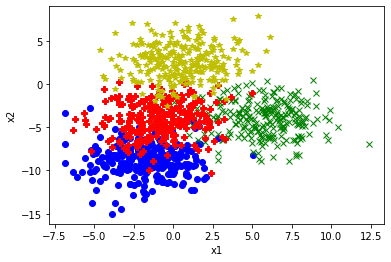

In [4]:
import numpy as np
pos0 = np.array(df[df['class'] == 0])
pos1 = np.array(df[df['class'] == 1])
pos2 = np.array(df[df['class'] == 2])
pos3 = np.array(df[df['class'] == 3])

import matplotlib.pyplot as plt
plt.plot(pos0[:,0],pos0[:,1],'bo')
plt.plot(pos1[:,0],pos1[:,1],'gx')
plt.plot(pos2[:,0],pos2[:,1],'rP')
plt.plot(pos3[:,0],pos3[:,1],'y*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [5]:
# looking at mean and variance of data  : 
data = np.array(df)
print(np.mean(data[:,0]),np.std(data[:,0]))
print(np.mean(data[:,1]),np.std(data[:,1]))

0.865396434749782 3.4738973793783807
-3.5347565211893355 4.513091397479357


In [6]:
# making input data : 
X = np.array([data[:,0],data[:,1]]) # first row is x1 and second x2
Y = np.zeros((4,X.shape[1]))
data_class = (data[:,2])
for i in range(X.shape[1]):
    arr = Y[:,i]
    arr[int(data_class[i])] = 1
    Y[:,i] = arr
print(X.shape,Y.shape)

(2, 1022) (4, 1022)


In [135]:
def soft(z):
    exps = np.exp(z)
    return exps / np.sum(exps,axis=0,keepdims = True)
def tan(x) :
    return np.tanh(x)

In [140]:
# Just one layer for softmax since 4 classes we have 4 neurons : 
def SOFTMAX(X,Y,num_iter=1000, lr = 0.0001 ):
    x = X
    y = Y
    m = Y.shape[1]
    w_ = np.random.rand(10,X.shape[0])*0.01 # 10 neurons in layer #1
    w = np.random.rand(4,10)*0.01           # 4 neurons, this is w.T in both cases
    b_ = np.zeros((10,1)) # bias for each neuron
    b = np.zeros((4,1))   # same !

    dj = []
    for i in range(num_iter + 1):
        z_ = np.dot(w_,x) + b_
        a = tan(z_)
        z = np.dot(w,a) + b
        h_theta = soft(z)
        cost = (-1/(m)) * np.sum(np.multiply(Y,np.log(h_theta)))
        dj.append(cost)
        
        dz = h_theta - y
        dw = (1/m) * np.dot(a,dz.T)
        db = (1/m) * np.sum(dz,axis = 1 , keepdims = True)
        
        
        dz_ = np.multiply(np.dot(w.T,dz) , (1 - np.power(a,2)))
        dw_ = (1/m) * np.dot(x,dz_.T)
        db_ = (1/m) * np.sum(dz_,axis = 1 , keepdims = True)
        w = w - lr*dw.T
        b = b - lr*db
        w_ = w_ - lr*dw_.T
        b_ = b_ - lr*db_
        if i % 100 == 0:
            print('cost after',i,'th iteration :',cost)
            #print(db.shape)
    return w,b,w_,b_,dj

In [141]:
w,b,w_,b_,dj = SOFTMAX(X,Y,1000,1)

cost after 0 th iteration : 1.3863055009275465
cost after 100 th iteration : 0.4707950001378204
cost after 200 th iteration : 0.3519601066482243
cost after 300 th iteration : 0.3235650023045651
cost after 400 th iteration : 0.3075076791128116
cost after 500 th iteration : 0.2985167777819318
cost after 600 th iteration : 0.28381259794528885
cost after 700 th iteration : 0.2808229257521113
cost after 800 th iteration : 0.2726365742034851
cost after 900 th iteration : 0.267207181160443
cost after 1000 th iteration : 0.2648419994014912


In [142]:
def forward_pass(X,w,b,w_,b_):
    z1 = np.dot(w_,X) + b_
    a1 = tan(z1)
    z2 = np.dot(w,a1) + b
    a2 = soft(z2)
    return a2

In [150]:
print(np.round(forward_pass(np.array([[1],[2]]),w,b,w_,b_)))

[[0.]
 [0.]
 [0.]
 [1.]]


In [143]:
# computing our accuracy on training set : 
print(np.mean(np.round(forward_pass(X,w,b,w_,b_)) == Y)*100,'% accuracy on training data')

94.9853228962818 % accuracy on training data


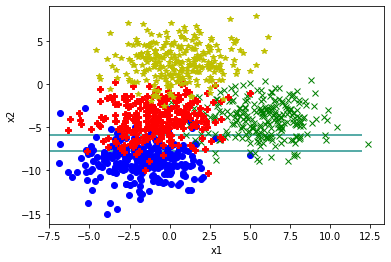

In [154]:
plt.plot(pos0[:,0],pos0[:,1],'bo')
plt.plot(pos1[:,0],pos1[:,1],'gx')
plt.plot(pos2[:,0],pos2[:,1],'rP')
plt.plot(pos3[:,0],pos3[:,1],'y*')
plt.xlabel('x1')
plt.ylabel('x2')

u_vals = np.linspace(-7.5,12,50)
v_vals= np.linspace(-15,2,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        a = np.array([[u_vals[i]],[v_vals[i]]])
        z[i,j] = np.max(forward_pass(a,w,b,w_,b_))
        #np.dot(mapFeaturePlot(u_vals[i],v_vals[j],6) , w)
plt.contour(u_vals,v_vals,z,0)

## Using Keras with same architecture : 

In [126]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation = 'tanh',input_shape=(2,)),
    tf.keras.layers.Dense(4,activation = 'softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics = ['acc'])
model.fit(X.T,Y.T,epochs = 1000)

Train on 1022 samples
Epoch 1/1000
1022/1022 [==============================] - 0s 358us/sample - loss: 2.1443 - acc: 0.0176
Epoch 2/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 1.3769 - acc: 0.3366
Epoch 3/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 1.0616 - acc: 0.6605
Epoch 4/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.8956 - acc: 0.7260
Epoch 5/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.7939 - acc: 0.7593
Epoch 6/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.7265 - acc: 0.7847
Epoch 7/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.6800 - acc: 0.8014
Epoch 8/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.6462 - acc: 0.8151
Epoch 9/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.6201 - acc: 0.8092
Epoch 10/1000
1022/1022 [==============================] - 

1022/1022 [==============================] - 0s 39us/sample - loss: 0.3115 - acc: 0.8933
Epoch 81/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.3100 - acc: 0.8914
Epoch 82/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.3098 - acc: 0.8924
Epoch 83/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.3091 - acc: 0.8924
Epoch 84/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.3081 - acc: 0.8914
Epoch 85/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.3076 - acc: 0.8943
Epoch 86/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.3065 - acc: 0.8963
Epoch 87/1000
1022/1022 [==============================] - ETA: 0s - loss: 0.2588 - acc: 0.906 - 0s 39us/sample - loss: 0.3056 - acc: 0.8943
Epoch 88/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.3059 - acc: 0.8953
Epoch 89/1000
1022/1022 [========================

1022/1022 [==============================] - 0s 39us/sample - loss: 0.2797 - acc: 0.8973
Epoch 159/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2782 - acc: 0.8914
Epoch 160/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2785 - acc: 0.8933
Epoch 161/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2786 - acc: 0.8924
Epoch 162/1000
1022/1022 [==============================] - 0s 31us/sample - loss: 0.2769 - acc: 0.8943
Epoch 163/1000
1022/1022 [==============================] - 0s 31us/sample - loss: 0.2772 - acc: 0.8973
Epoch 164/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2770 - acc: 0.8992
Epoch 165/1000
1022/1022 [==============================] - 0s 31us/sample - loss: 0.2768 - acc: 0.8973
Epoch 166/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2773 - acc: 0.8943
Epoch 167/1000
1022/1022 [==============================] - 0s 39us/sample - lo

1022/1022 [==============================] - 0s 39us/sample - loss: 0.2676 - acc: 0.8933
Epoch 237/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2684 - acc: 0.8963
Epoch 238/1000
1022/1022 [==============================] - 0s 31us/sample - loss: 0.2692 - acc: 0.8953
Epoch 239/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2697 - acc: 0.8924
Epoch 240/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2692 - acc: 0.8924
Epoch 241/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2688 - acc: 0.8933
Epoch 242/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2668 - acc: 0.8973
Epoch 243/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2677 - acc: 0.8953
Epoch 244/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2685 - acc: 0.8933
Epoch 245/1000
1022/1022 [==============================] - 0s 39us/sample - lo

1022/1022 [==============================] - 0s 39us/sample - loss: 0.2651 - acc: 0.8953
Epoch 315/1000
1022/1022 [==============================] - 0s 37us/sample - loss: 0.2639 - acc: 0.8933
Epoch 316/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2629 - acc: 0.8973
Epoch 317/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2637 - acc: 0.8924
Epoch 318/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2631 - acc: 0.8933
Epoch 319/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2638 - acc: 0.8924
Epoch 320/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2626 - acc: 0.8953
Epoch 321/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2658 - acc: 0.8904
Epoch 322/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2646 - acc: 0.8933
Epoch 323/1000
1022/1022 [==============================] - 0s 39us/sample - lo

1022/1022 [==============================] - 0s 39us/sample - loss: 0.2606 - acc: 0.8973
Epoch 393/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2612 - acc: 0.8963
Epoch 394/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2620 - acc: 0.8953
Epoch 395/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2633 - acc: 0.8933
Epoch 396/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2601 - acc: 0.8992
Epoch 397/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2598 - acc: 0.8963
Epoch 398/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2614 - acc: 0.8943
Epoch 399/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2606 - acc: 0.8992
Epoch 400/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2623 - acc: 0.8943
Epoch 401/1000
1022/1022 [==============================] - 0s 39us/sample - lo

1022/1022 [==============================] - 0s 39us/sample - loss: 0.2595 - acc: 0.8933
Epoch 471/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2590 - acc: 0.8953
Epoch 472/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2575 - acc: 0.8963
Epoch 473/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2557 - acc: 0.9012
Epoch 474/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2575 - acc: 0.8953
Epoch 475/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2608 - acc: 0.8963
Epoch 476/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2609 - acc: 0.8973
Epoch 477/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2577 - acc: 0.8953
Epoch 478/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2601 - acc: 0.8963
Epoch 479/1000
1022/1022 [==============================] - 0s 39us/sample - lo

1022/1022 [==============================] - 0s 39us/sample - loss: 0.2583 - acc: 0.8943
Epoch 549/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2595 - acc: 0.8924
Epoch 550/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2592 - acc: 0.8982
Epoch 551/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2585 - acc: 0.8973
Epoch 552/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2582 - acc: 0.8914
Epoch 553/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2585 - acc: 0.8953
Epoch 554/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2593 - acc: 0.8933
Epoch 555/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2574 - acc: 0.8943
Epoch 556/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2569 - acc: 0.8933
Epoch 557/1000
1022/1022 [==============================] - 0s 39us/sample - lo

1022/1022 [==============================] - 0s 47us/sample - loss: 0.2568 - acc: 0.8963
Epoch 627/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2556 - acc: 0.8992
Epoch 628/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2570 - acc: 0.9002
Epoch 629/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2572 - acc: 0.8933
Epoch 630/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2573 - acc: 0.8914
Epoch 631/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2567 - acc: 0.8963
Epoch 632/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2566 - acc: 0.8943
Epoch 633/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2570 - acc: 0.8973
Epoch 634/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2571 - acc: 0.8924
Epoch 635/1000
1022/1022 [==============================] - 0s 47us/sample - lo

1022/1022 [==============================] - 0s 42us/sample - loss: 0.2560 - acc: 0.8924
Epoch 705/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2556 - acc: 0.8943
Epoch 706/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2594 - acc: 0.8914
Epoch 707/1000
1022/1022 [==============================] - 0s 44us/sample - loss: 0.2566 - acc: 0.8924
Epoch 708/1000
1022/1022 [==============================] - 0s 55us/sample - loss: 0.2577 - acc: 0.8943
Epoch 709/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2558 - acc: 0.8953
Epoch 710/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2555 - acc: 0.8953
Epoch 711/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2561 - acc: 0.8943
Epoch 712/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2549 - acc: 0.8953
Epoch 713/1000
1022/1022 [==============================] - 0s 39us/sample - lo

1022/1022 [==============================] - 0s 39us/sample - loss: 0.2568 - acc: 0.8963
Epoch 783/1000
1022/1022 [==============================] - 0s 55us/sample - loss: 0.2557 - acc: 0.8973
Epoch 784/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2550 - acc: 0.8982
Epoch 785/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2560 - acc: 0.8933
Epoch 786/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2587 - acc: 0.8933
Epoch 787/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2543 - acc: 0.8973
Epoch 788/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2561 - acc: 0.8982
Epoch 789/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2557 - acc: 0.8943
Epoch 790/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2550 - acc: 0.8973
Epoch 791/1000
1022/1022 [==============================] - 0s 47us/sample - lo

1022/1022 [==============================] - 0s 47us/sample - loss: 0.2539 - acc: 0.8943
Epoch 861/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2552 - acc: 0.8982
Epoch 862/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2563 - acc: 0.8924
Epoch 863/1000
1022/1022 [==============================] - 0s 42us/sample - loss: 0.2546 - acc: 0.8973
Epoch 864/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2559 - acc: 0.8973
Epoch 865/1000
1022/1022 [==============================] - 0s 42us/sample - loss: 0.2543 - acc: 0.8924
Epoch 866/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2574 - acc: 0.8924
Epoch 867/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2539 - acc: 0.8943
Epoch 868/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2556 - acc: 0.8914
Epoch 869/1000
1022/1022 [==============================] - 0s 47us/sample - lo

1022/1022 [==============================] - 0s 39us/sample - loss: 0.2554 - acc: 0.8953
Epoch 939/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2556 - acc: 0.8924
Epoch 940/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2547 - acc: 0.8943
Epoch 941/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2536 - acc: 0.8924
Epoch 942/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2561 - acc: 0.8943
Epoch 943/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2561 - acc: 0.8963
Epoch 944/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2560 - acc: 0.8933
Epoch 945/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2547 - acc: 0.8982
Epoch 946/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2554 - acc: 0.8963
Epoch 947/1000
1022/1022 [==============================] - 0s 47us/sample - lo